I present you with the 1D diffusion equation:
$$
\frac{\partial u}{\partial t}
=
\nu \frac{\partial^2 u}{\partial x^2}
$$

Using a central difference for the second order derivative, we get,
$$
\frac{u^{n+1}_{i} - u^{n}_{i}}{\Delta t}
=
\nu \frac{u^{n}_{i+1} - 2u^{n}_{i} + u^{n}_{i-1}}{\left(\Delta x\right)^2}
$$

Again, we want to let thesystem evolve with time, so we need to rearange the equation somewhat,
$$
u^{n+1}_{i} 
= 
u^{n}_{i}
+ \nu\frac{\Delta t}{\left(\Delta x\right)^2}
\left( u^{n}_{i+1} - 2u^{n}_{i} + u^{n}_{i-1} \right)
$$

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation, rc
from IPython.display import HTML

In [2]:
### PARAMETERS
nu = 0.3
sigma = 0.2
L = 2.0
nx = 81
dx = L / (nx -1)
nt = 85
dt = sigma * dx**2 / nu


u = np.ones(nx)
u[int(0.5 / dx): int(1/dx+1)] = 2
un = np.ones(nx)


for n in range(nt):
    un = u.copy()
    for i in range(1,nx-1):
        u[i] = un[i] + nu*(dt/dx**2)*(un[i+1] -2*un[i] + un[i-1]) 

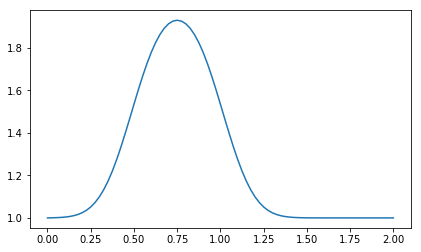

In [3]:
fig = plt.figure(figsize=(15, 4))
ax = fig.add_subplot(121)

ax.plot(np.linspace(0, 2, nx), u)
plt.show()

In [12]:
### PARAMETERS
nu = 0.3
sigma = 0.2
L = 2.0
nx = 85
dx = L / (nx -1)
nt = 800
dt = sigma * dx**2 / nu


u = np.ones(nx)
u[int(0.5 / dx): int(1/dx+1)] = 2
un = np.ones(nx)


def animate(n):
    un = u.copy()
    for i in range(1,nx-1):
        u[i] = un[i] + nu*(dt/dx**2)*(un[i+1] -2*un[i] + un[i-1]) 
    line.set_data(np.linspace(0, 2, nx), u)
    return (line,)
        
fig, ax = plt.subplots()
ax.set_xlim((0, 2))
ax.set_ylim((0, 2.5))
line, = ax.plot([], [], lw=2)

anim = animation.FuncAnimation(fig, animate, frames=nt, interval=10, blit=True)
plt.close()
HTML(anim.to_html5_video())